# Customer Churn Prediction 

**Aim:** 

The aim of this project is to predict customer churn (the likelihood of customers leaving a company). By analyzing customer data, the model will identify patterns and factors contributing to customer attrition, enabling businesses to take proactive measures to retain customers and improve service offerings.

**Loading Dataset**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- It looks like our target column has an imbalance between "Yes" and "No" values.

**Feature Elimination**

- drop customer ID , as it is of no use 

In [4]:
df.drop(["customerID"],axis=1,inplace=True)

## **Data Understanding**

In [5]:
df.shape

(7043, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- All column data types are correct except for TotalCharges, which is showing as an object, but it should be a float.

- here TotalCharges column actually contain float values , but here it showing object as data type . so lets convert that to float
- let's see which rows contain these kind of values 

In [7]:
# pd.to_numeric(df.TotalCharges) 

- Unable to parse string " " at position 488
-  some values are empty stings , so we can't convert empty string to float
-  filter rows in a DataFrame (df) where the TotalCharges column has non-numeric values.
- if there’s a string like "unknown" or any other non-numeric value), it will be replaced with NaN (Not a Number), because of the errors='coerce' argument.

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- we can clearly see that for these rows of TotalChareges, all the value are empty
- as these are only 11 rows , we acn simply drop them 

**Remove rows with space in TotalCharges**

In [9]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1['TotalCharges'].dtype

dtype('O')

In [11]:
df1["TotalCharges"] = df1["TotalCharges"].astype(float)

In [12]:
df1["TotalCharges"].dtype

dtype('float64')

**Now understand each column**

Before fixing wrong data formats, we should first check what kind of values are present in each column. This helps us identify:
- Unexpected values
- Incorrect formats
- Missing or special characters

In [13]:
# Check unique values for each column
for column in df1.columns:
    print(f"Column: {column}")
    print(df1[column].unique()[:20])  # Show first 20 unique values
    print("-" * 40)

Column: gender
['Female' 'Male']
----------------------------------------
Column: SeniorCitizen
[0 1]
----------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30]
----------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------
Column: OnlineBackup
['Yes' 'No' 'No internet service']
----------------------------------------
Column: DeviceProtection
['No' 'Yes' 'No internet service']
----------------------------------------
Column: TechSupport
['No' 'Yes' 'No i

- it is easy to check unique values in categorical and count vatiables 
- but its very difficult to findout wrong data formats in continous variables 
- so , here is the code to check , wrong data format in continuous variables 

In [14]:
# List of continuous columns
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  

# Check for wrong formats in continuous columns
for col in continuous_cols:
    wrong_values = df1[~df1[col].astype(str).str.replace('.', '', 1).str.isdigit()]  # Keep decimal numbers valid
    
    if not wrong_values.empty:
        print(f"Column with wrong format: {col}")
        print("Wrong Values Found:")
        print(wrong_values[[col]])  # Print only the column with wrong values
        print("-" * 60)


- Column Data Types:
  - All columns contain values consistent with their defined data types.
  - No columns have mixed or incorrect data types (e.g., no strings in numerical columns or vice versa).

- Data Integrity:
  - No incorrect or invalid data is present in any column (e.g., no negative values in age, no typos in categorical columns).
  - All values align with the expected domain or range for their respective columns. 

In [15]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
# check for any wrong column names 
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Every column looks perfect, with no extra spaces at the beginning or end.

**Handling missing values**

In [17]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**checking for duplicate values**

In [18]:
df1.duplicated().sum()

22

## **Data Cleaning**

In [19]:
duplicates = df1[df1.duplicated()]
duplicates

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [20]:
# Dropping duplicate rows from the original dataframe
df1 = df1.drop_duplicates()

# Verify if duplicates are removed
print(f"Total rows after removing duplicates: {df1.shape[0]}")

Total rows after removing duplicates: 7010


**Fixing wrong data format**

Before cleaning data, we need to check for incorrect formats in both categorical and continuous variables.

- Check Unique Values for Each Column
  - This helps identify unexpected values in both categorical and numerical columns.
  - If a column has wrong data (like "?", "NA", or text in numerical fields), we can spot it.

- Check Data Types for Each Column
  - Confirms if each column is in the correct format.
  - Identifies numerical columns stored as object (string) due to formatting issues.
 
- Check for Missing Values After Fixing Formats

In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [23]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


**one hot encoding for categorical problems**

In [24]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'],drop_first=True)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

**Data Visualization**

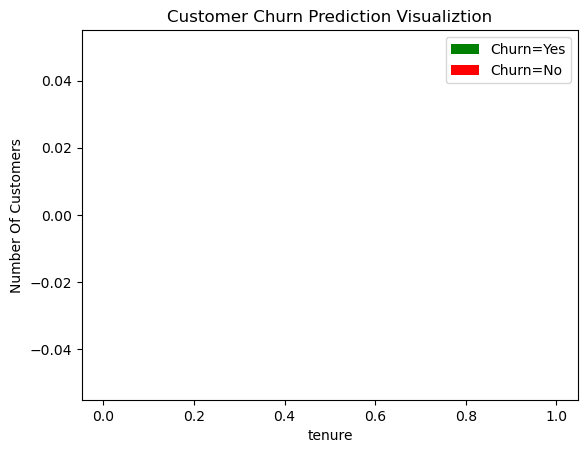

In [25]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

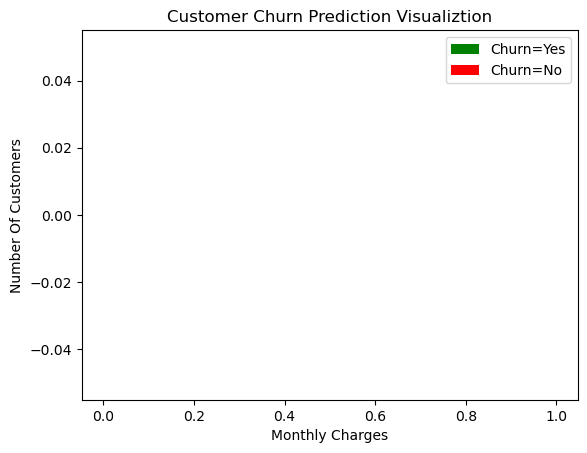

In [26]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**outliers**

In [27]:
# List of numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Detect outliers using IQR
for column in numerical_columns:
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df2[(df2[column] < lower_bound) | (df2[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f"Number of Outliers: {outliers.shape[0]}")
    print("\n" + "-"*40 + "\n")


Column: tenure
Number of Outliers: 0

----------------------------------------

Column: MonthlyCharges
Number of Outliers: 0

----------------------------------------

Column: TotalCharges
Number of Outliers: 0

----------------------------------------



**Scaling**

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [29]:
df2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,False,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,False,False,True,False,False,False,True


**x & y**

In [30]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [31]:
r2=[]
cv=[]
for i in range(1,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)
    
    ypred_train=model.predict(x_train)
    
    from sklearn.metrics import r2_score
    r2.append(r2_score(y_train,ypred_train))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5,scoring="r2").mean())

a=pd.DataFrame({"r2":r2,"cv":cv})
b=a[(abs(a["r2"]-a["cv"])<=0.05)]
c=b[b["cv"]==b["cv"].max()].index.tolist()[0]
print(c)

58


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=77)     

In [33]:
x_train.shape

(5608, 23)

**Build an ANN model**

In [34]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7433 - loss: 0.5174
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8011 - loss: 0.4169
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8004 - loss: 0.4281
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8092 - loss: 0.4157
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4267
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8033 - loss: 0.4251
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.8084 - loss: 0.4085
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8081 - loss: 0.4218
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.8056 - loss: 0.4218
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8104 - loss: 0.4056
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8138 - loss: 0.4133
Epoch 12/100
176/176 ━━━━

In [35]:
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.7866 - loss: 0.4714


[0.451015442609787, 0.7874464988708496]

In [36]:
y_pred = model.predict(x_test)
y_pred[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.15099083],
       [0.4337818 ],
       [0.1552093 ],
       [0.0039177 ],
       [0.4131872 ]], dtype=float32)

In [37]:
y_predicted = []
for element in y_pred:
    if element > 0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [38]:
y_predicted[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [39]:
y_test[:10]

6954    0
3086    0
2559    0
1035    0
1469    1
6424    1
2467    0
862     1
2540    0
6586    0
Name: Churn, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1001
           1       0.66      0.52      0.58       401

    accuracy                           0.79      1402
   macro avg       0.74      0.71      0.72      1402
weighted avg       0.78      0.79      0.78      1402



Text(95.72222222222221, 0.5, 'Truth')

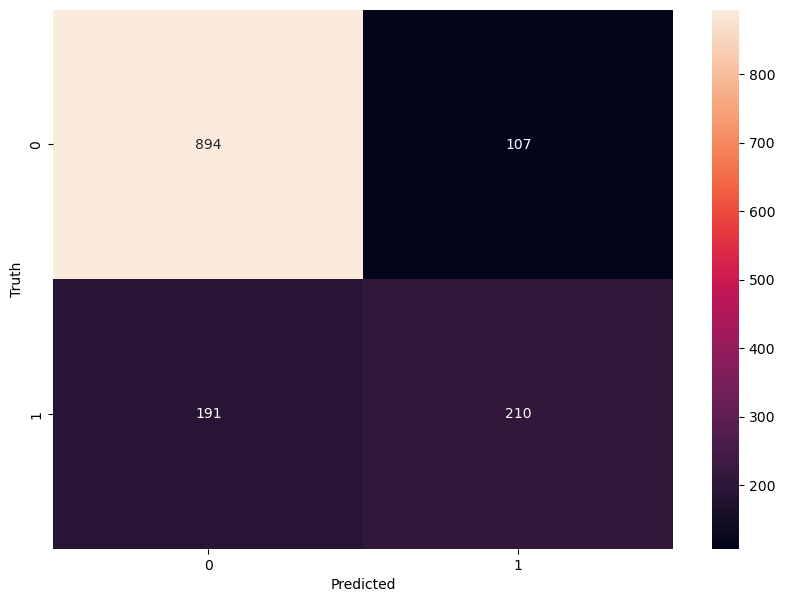

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Logistic 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model=LogisticRegression()
log_model.fit(x_train,y_train)

ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))
print("\n")
# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.8092011412268189
cv : 0.8059907995312308
Test accuracy : 0.7945791726105563


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1001
           1       0.69      0.51      0.59       401

    accuracy                           0.79      1402
   macro avg       0.76      0.71      0.72      1402
weighted avg       0.78      0.79      0.78      1402

Confusion Matrix (Test):
[[911  90]
 [198 203]]


In [43]:

# Initialize the logistic regression model
log_model = LogisticRegression(class_weight='balanced')

# Cross-validation
cv_scores = cross_val_score(log_model, x_train, y_train, cv=5, scoring="accuracy")
print("CV Accuracy (mean):", cv_scores.mean())

# Fit the model on the training data
log_model.fit(x_train, y_train)

# Make predictions
ypred_train = log_model.predict(x_train)
ypred_test = log_model.predict(x_test)

# Accuracy on train and test data
print("Train Accuracy:", accuracy_score(y_train, ypred_train))
print("Test Accuracy:", accuracy_score(y_test, ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

CV Accuracy (mean): 0.7435759706526355
Train Accuracy: 0.7451854493580599
Test Accuracy: 0.7746077032810271


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1001
           1       0.57      0.82      0.67       401

    accuracy                           0.77      1402
   macro avg       0.74      0.79      0.75      1402
weighted avg       0.82      0.77      0.78      1402

Confusion Matrix (Test):
[[758 243]
 [ 73 328]]


## Knn

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,20)),'p':[1,2]}
knn_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
knn_hp.fit(x_train,y_train)
knn_hp.best_estimator_

KNeighborsClassifier(n_neighbors=18)

In [45]:
knn_model=knn_hp.best_estimator_
knn_model.fit(x_train,y_train)

ypred_train=knn_model.predict(x_train)
ypred_test=knn_model.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.8100927246790299
cv : 0.7872664303739498
Test accuracy : 0.7831669044222539


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1001
           1       0.68      0.47      0.55       401

    accuracy                           0.78      1402
   macro avg       0.74      0.69      0.70      1402
weighted avg       0.77      0.78      0.77      1402

Confusion Matrix (Test):
[[911  90]
 [214 187]]


## SVM 

In [46]:
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.001,0.01,0.1,1,10],'kernel':["linear","sigmoid","poly","rbf"]}
svm_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
svm_hp.fit(x_train,y_train)
svm_hp.best_estimator_

SVC(C=1)

In [47]:
svm_model=svm_hp.best_estimator_
svm_model.fit(x_train,y_train)

ypred_train=svm_model.predict(x_train)
ypred_test=svm_model.predict(x_test)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.8250713266761769
cv : 0.8029603374883324
Test accuracy : 0.7803138373751783


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1001
           1       0.68      0.44      0.54       401

    accuracy                           0.78      1402
   macro avg       0.74      0.68      0.70      1402
weighted avg       0.77      0.78      0.76      1402

Confusion Matrix (Test):
[[916  85]
 [223 178]]


## Decision Tree 

In [48]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

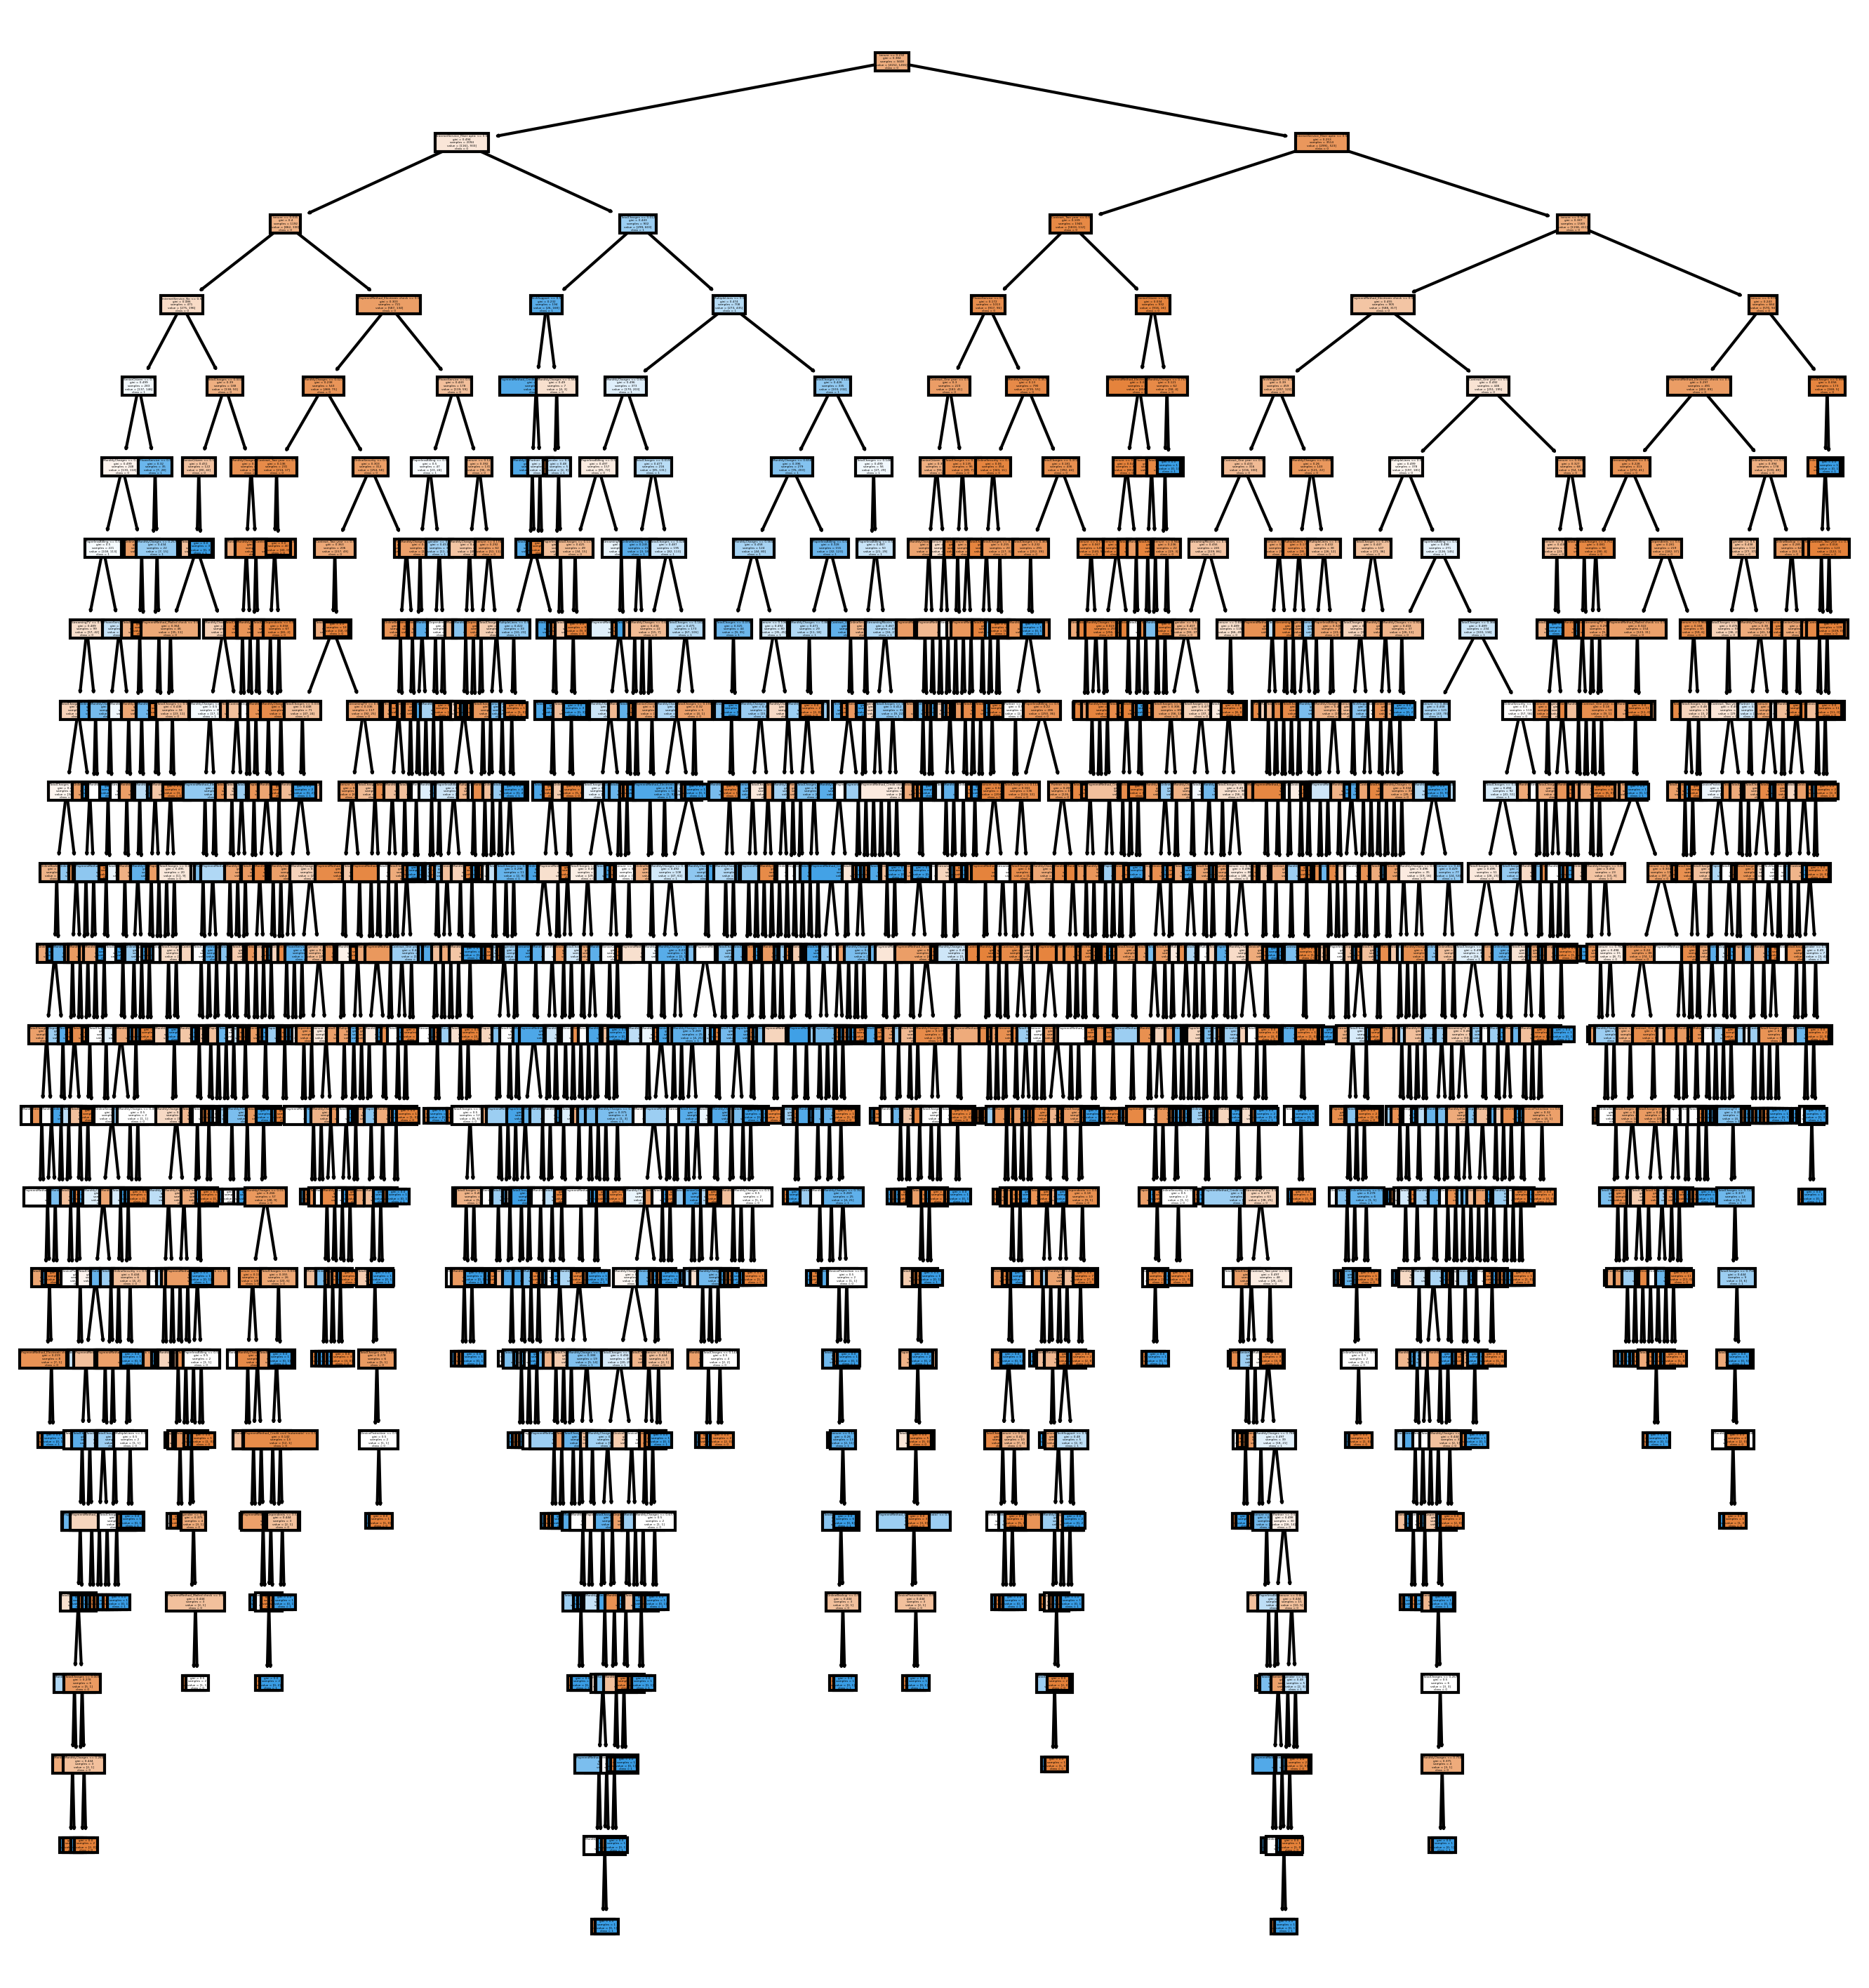

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(11,12),dpi=300)
plot_tree(model,filled=True,feature_names=x.columns.tolist(),class_names=["0","1"])
plt.show()

In [50]:
estimator=DecisionTreeClassifier(random_state=True)
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,26))}
dt_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
dt_hp.fit(x_train,y_train)
dt=dt_hp.best_estimator_

In [51]:
fea=pd.DataFrame(data=dt.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['tenure', 'InternetService_Fiber optic']

In [52]:
x_train_dt=x_train[features]
x_test_dt=x_test[features]

dt=dt_hp.best_estimator_
dt.fit(x_train_dt,y_train)
ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.7945791726105563
cv : 0.7924387920767205
Test accuracy : 0.7738944365192582


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1001
           1       0.69      0.38      0.49       401

    accuracy                           0.77      1402
   macro avg       0.74      0.66      0.67      1402
weighted avg       0.76      0.77      0.75      1402

Confusion Matrix (Test):
[[933  68]
 [249 152]]


## Random Forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,26))}
rf_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
rf_hp.fit(x_train,y_train)
rf=rf_hp.best_estimator_
rf

RandomForestClassifier(n_estimators=20, random_state=True)

In [54]:
fea=pd.DataFrame(data=rf.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [55]:
x_train_rf=x_train[features]
x_test_rf=x_test[features]

rf=rf_hp.best_estimator_
rf.fit(x_train_rf,y_train)
ypred_train=rf.predict(x_train_rf)
ypred_test=rf.predict(x_test_rf)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.9934022824536377
cv : 0.7885159513485064
Test accuracy : 0.7767475035663338


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1001
           1       0.66      0.45      0.53       401

    accuracy                           0.78      1402
   macro avg       0.73      0.68      0.69      1402
weighted avg       0.76      0.78      0.76      1402

Confusion Matrix (Test):
[[910  91]
 [222 179]]


## Ada boost 

In [56]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,26))}
ada_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
ada_hp.fit(x_train,y_train)
ada=ada_hp.best_estimator_
ada

AdaBoostClassifier(n_estimators=21, random_state=True)

In [57]:
fea=pd.DataFrame(data=ada.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['SeniorCitizen',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

In [58]:
x_train_ada=x_train[features]
x_test_ada=x_test[features]

ada=ada_hp.best_estimator_
ada.fit(x_train_ada,y_train)
ypred_train=ada.predict(x_train_ada)
ypred_test=ada.predict(x_test_ada)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(ada,x_train_ada,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.8092011412268189
cv : 0.800824003269299
Test accuracy : 0.7917261055634808


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1001
           1       0.69      0.49      0.57       401

    accuracy                           0.79      1402
   macro avg       0.75      0.70      0.72      1402
weighted avg       0.78      0.79      0.78      1402

Confusion Matrix (Test):
[[913  88]
 [204 197]]


## Grad boosting

In [60]:

from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,26)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grad_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grad_hp.fit(x_train,y_train)
grad=grad_hp.best_estimator_

fea=pd.DataFrame(data=grad.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [61]:
x_train_grad=x_train[features]
x_test_grad=x_test[features]

grad=grad_hp.best_estimator_
grad.fit(x_train_grad, y_train)
ypred_train = grad.predict(x_train_grad)  
ypred_test = grad.predict(x_test_grad)
print("Train accuracy :", accuracy_score(y_train, ypred_train))
print("cv :", cross_val_score(grad, x_train_grad, y_train, cv=5, scoring="accuracy").mean())
print("Test accuracy :", accuracy_score(y_test, ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.8206134094151213
cv : 0.8043860444185784
Test accuracy : 0.782453637660485


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1001
           1       0.68      0.45      0.54       401

    accuracy                           0.78      1402
   macro avg       0.74      0.68      0.70      1402
weighted avg       0.77      0.78      0.77      1402

Confusion Matrix (Test):
[[917  84]
 [221 180]]


## xg boost 

In [62]:

from xgboost import XGBClassifier
estimator=XGBClassifier(random_state=1)
param_grid={"n_estimators":[10,20,30,40,50],"max_depth":[3,4,5,6,7,8,9],'gamma':[0,0.15,0.3,0.5,1]}
xg_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
xg_hp.fit(x_train,y_train)
xg=xg_hp.best_estimator_
 

fea=pd.DataFrame(data=xg.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features


['gender',
 'SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [63]:

x_train_xg=x_train[features]
x_test_xg=x_test[features]

xg=xg_hp.best_estimator_
xg.fit(x_train_xg, y_train)
ypred_train = xg.predict(x_train_xg)  
ypred_test = xg.predict(x_test_xg)
print("Train accuracy :", accuracy_score(y_train, ypred_train))
print("cv :", cross_val_score(xg, x_train_grad, y_train, cv=5, scoring="accuracy").mean())
print("Test accuracy :", accuracy_score(y_test, ypred_test))

print("\n")

# Other evaluation metrics
print("Classification Report (Test):")
print(classification_report(y_test, ypred_test))

# Confusion Matrix
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, ypred_test))

Train accuracy : 0.81811697574893
cv : 0.8043854083681969
Test accuracy : 0.7867332382310984


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1001
           1       0.69      0.47      0.56       401

    accuracy                           0.79      1402
   macro avg       0.75      0.69      0.71      1402
weighted avg       0.78      0.79      0.77      1402

Confusion Matrix (Test):
[[916  85]
 [214 187]]


- Logistic Regression is working well because, in the confusion matrix, the number of actual churn cases that the model incorrectly predicts as no churn is low. Since this value is the least among all algorithms tested, Logistic Regression is the better choice. 